In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#data collection and processing

In [8]:
csv="gld_price_data.csv"
gold=pd.read_csv(csv)

In [9]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold.shape

(2290, 6)

In [14]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:
### 1.Positive and 2. Negative

In [17]:
correlation=gold.corr()

In [19]:
# constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

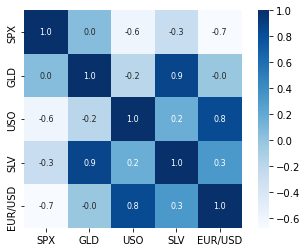

In [20]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/Users/sahilkwakode/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

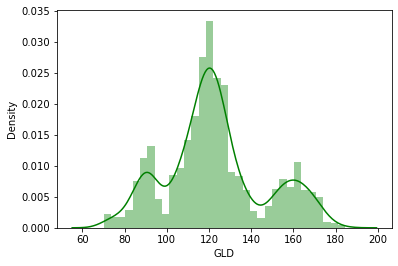

In [22]:
sns.distplot(gold['GLD'],color='green')

In [24]:
X=gold.drop(['Date','GLD'],axis=1
           )
Y=gold['GLD']

In [25]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [26]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [27]:
#splitting in training and test data

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
#Random Forest Regressor

In [30]:
regressor=RandomForestRegressor(n_estimators=100)

In [31]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
#model evaluation

In [33]:
y_pred=regressor.predict(X_test)

In [34]:
y_pred

array([168.66530013,  81.84619998, 115.9354001 , 127.60200099,
       120.67740147, 154.57689667, 150.21439872, 126.23190018,
       117.49779876, 126.1663    , 116.39040114, 172.09680036,
       141.67839879, 168.20599899, 115.17580016, 117.58880061,
       138.34650284, 170.54110114, 159.98950326, 160.41549811,
       154.86220027, 125.24760044, 176.06759977, 157.12740328,
       125.16610017,  93.74379967,  77.31330018, 120.6542997 ,
       119.00409871, 167.49479978,  88.31060026, 125.09020004,
        90.93600064, 117.67450022, 121.15199945, 136.55240104,
       115.48220096, 115.46850101, 147.3769    , 107.07960114,
       104.0764024 ,  87.2098978 , 126.46460054, 117.77459993,
       153.213999  , 119.4456001 , 108.41659965, 108.01899817,
        93.2075006 , 127.11039794,  74.86520054, 113.7326992 ,
       121.5405    , 111.43329907, 118.80159875, 120.81339929,
       160.35999962, 167.1139015 , 146.82999694,  85.76149859,
        94.07940048,  86.8371984 ,  90.43050025, 118.96

In [35]:
#R squared error
error_score=metrics.r2_score(Y_test,y_pred)

In [36]:
error_score

0.9899015799303551

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

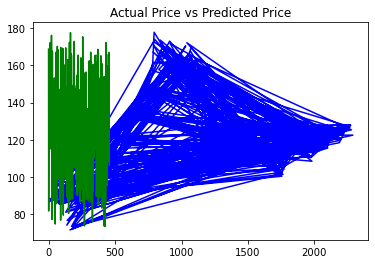

In [37]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(y_pred,color='green',label='Predicted value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GL")